In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression



In [2]:
df = pd.read_csv('data/medical_insurance.csv')

In [3]:
df.head(5)


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [4]:
df.shape

(100000, 54)

EDA

In [5]:
df.dtypes

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                    

In [6]:
df.head().T

,0,1,2,3,4
person_id,75722,80185,19865,76700,92992
age,52,79,68,15,53
sex,Female,Female,Male,Male,Male
region,North,North,North,North,Central
urban_rural,Suburban,Urban,Rural,Suburban,Suburban
income,22700.0,12800.0,40700.0,15600.0,89600.0
education,Doctorate,No HS,HS,Some College,Doctorate
marital_status,Married,Married,Married,Married,Married
employment_status,Retired,Employed,Retired,Self-employed,Self-employed
household_size,3,3,5,5,2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


In [6]:
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

30% of alchcol freq column is null

In [9]:
# Fill all NaN values with an empty string
df_filled = df.fillna('')


In [10]:
df_filled.isnull().sum()

person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

In [11]:
df_filled[df_filled['age'] == 0 ]

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
368,7678,0,Female,South,Suburban,68300.0,Masters,Single,Employed,2,...,0,0,0,0,0,0,0,0,0,0
1815,4780,0,Female,West,Rural,103200.0,Doctorate,Married,Self-employed,3,...,0,0,0,0,0,0,1,0,0,0
2420,53869,0,Male,Central,Urban,65200.0,Masters,Married,Employed,3,...,0,0,1,0,0,0,1,0,0,0
2740,11644,0,Female,South,Urban,4800.0,Masters,Married,Employed,4,...,0,0,0,1,0,0,0,1,0,0
2769,10767,0,Male,South,Urban,47700.0,Some College,Single,Employed,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99262,41431,0,Female,North,Urban,36100.0,Bachelors,Married,Employed,3,...,0,0,0,0,0,0,0,0,0,0
99578,93849,0,Female,West,Suburban,143900.0,Bachelors,Married,Retired,4,...,0,1,0,1,0,0,2,0,0,0
99717,20933,0,Male,South,Urban,12300.0,HS,Married,Employed,3,...,0,0,0,1,0,1,1,1,0,0
99795,46577,0,Female,South,Suburban,21700.0,HS,Single,Self-employed,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
len(df_filled[df_filled['age'] == 0 ]) / (len(df_filled)) * 100

0.165

0.165% of people's age is unknown

In [13]:
df_filled['is_high_risk'].value_counts(normalize=True) * 100

is_high_risk
0    63.219
1    36.781
Name: proportion, dtype: float64

Looks like data is slightly imbalanced so using PR, recall and F1 score for accuracy

In [14]:
df_filled.duplicated().sum()


np.int64(0)

In [15]:
numerical = ['age',
             'income',
             'bmi',
             'medication_count',
             'systolic_bp',
             'diastolic_bp',
             'ldl',
             'hba1c',
             'risk_score',
             'annual_medical_cost',
             'chronic_count',
             'hypertension',
             'diabetes',
             'asthma',
             'copd',
             'cardiovascular_disease', 
             'cancer_history',
             'kidney_disease',
             'liver_disease',
             'arthritis',
             'mental_health',
             'had_major_procedure',
             'is_high_risk']



categorical = ['sex','urban_rural','marital_status','employment_status', 'smoker']


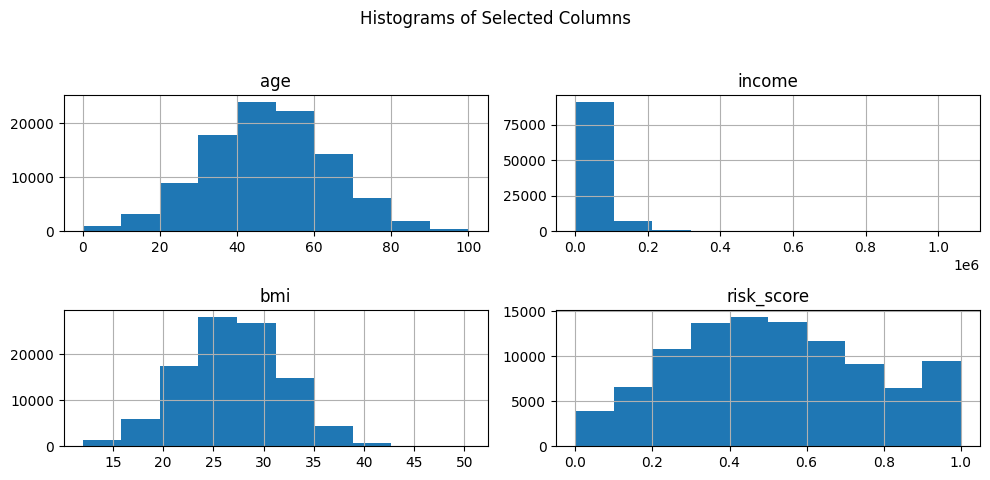

In [16]:
# Generate histograms for the specified columns
columns_to_plot=['age','income','bmi','risk_score']

# Plot separate histograms for the specified columns
df_filled[columns_to_plot].dropna().hist(figsize=(10, 5)) # Adjust figsize as needed for better visualization
plt.suptitle('Histograms of Selected Columns') # Add a title to the overall figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


Histogram shows rang of values for the selected column age,income,bmi & risks_score. Most people between 40-60 age group. bmi is between 25-30. Risk score between 0.4-0.6. Income between 0-250,000

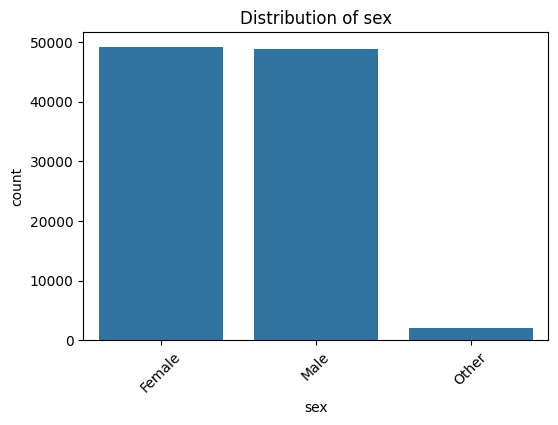

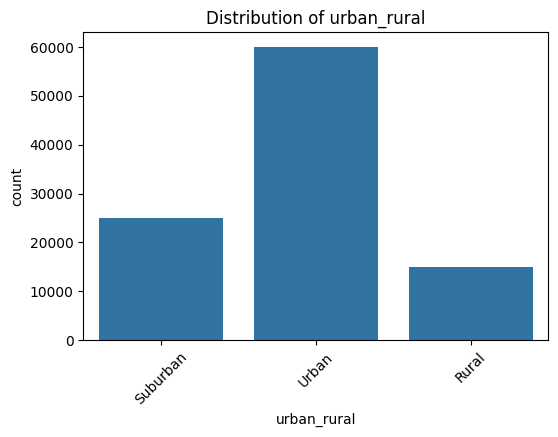

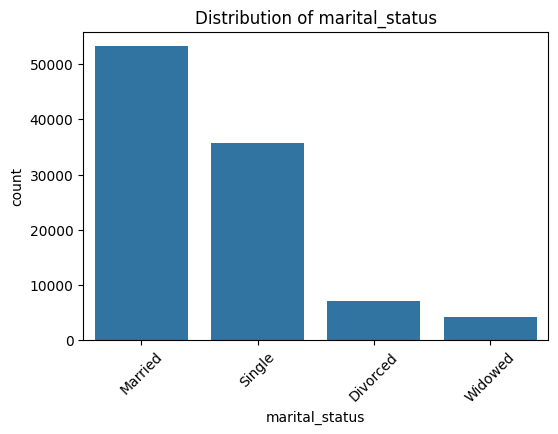

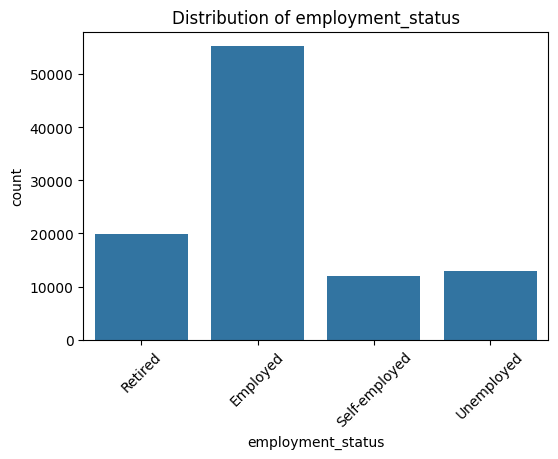

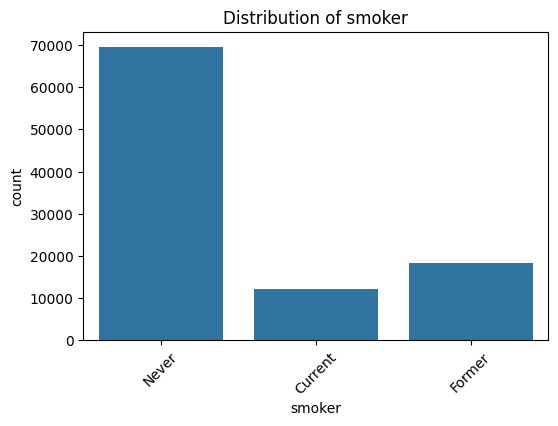

In [17]:
import seaborn as sns
# Lets find categorical variables distrubution
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_filled)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [18]:
df_filled[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00
systolic_bp,100000.0,117.808970,15.369187,61.00,107.0000,117.0000,128.0000,183.00
diastolic_bp,100000.0,73.604770,8.900924,40.00,67.0000,73.0000,79.0000,114.00
ldl,100000.0,119.975065,30.262086,30.00,99.4000,120.0000,140.3000,248.30
hba1c,100000.0,5.605968,0.845996,3.54,5.1600,5.4400,5.7600,11.94
risk_score,100000.0,0.519849,0.250669,0.00,0.3297,0.5055,0.7033,1.00
annual_medical_cost,100000.0,3009.451907,3127.462822,55.55,1175.1175,2082.5750,3707.9575,65724.90


Lets draw heatmap to find any corelation between the selected numerical columns and is_high_risk

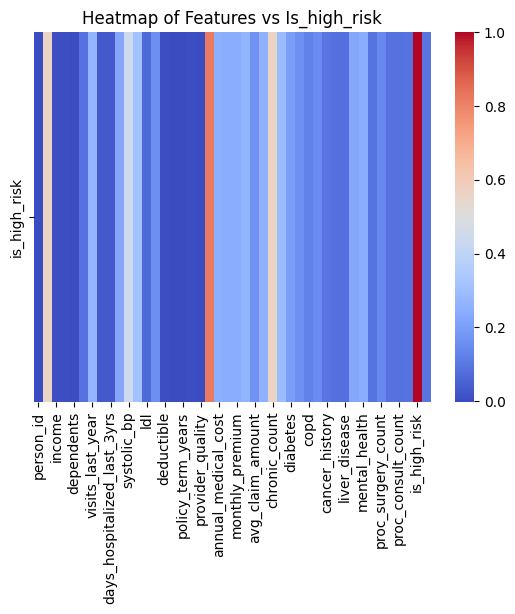

In [19]:
#import seaborn as sns

target = ['is_high_risk']
numeric_cols = df_filled.select_dtypes(include=["int64", "float64"]).columns

#numerical.append('is_high_risk')
df_filled_heatmap = df_filled[numeric_cols] #df_filled[numerical + target]
# Compute correlations of all columns with 'Target'
corr = df_filled_heatmap.corr(numeric_only=True)[['is_high_risk']].T

# Create heatmap (no numbers shown)
sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.title('Heatmap of Features vs Is_high_risk')
plt.show()


is_high_risk has corelationship with risk_score,chronic_count,annual_medical_count and age

Feature Engineering

There are total of 10 diseases measured here, given below
            'hypertension',
             'diabetes',
             'asthma',
             'copd',
             'cardiovascular_disease', 
             'cancer_history',
             'kidney_disease',
             'liver_disease',
             'arthritis',
             'mental_health',



In [20]:
# list of diseases -> ['hypertension','diabetes','copd','cardiovascular_disease',
 #                'kidney_disease','liver_disease','cancer_history',
 #                'arthritis','mental_health']

diseases_list = ['hypertension','diabetes','copd','cardiovascular_disease',
                'kidney_disease','liver_disease','cancer_history',
                 'arthritis','mental_health']
#does chronic_count gives sum of disease for that indiviual ?
result = (df_filled['chronic_count'] == df_filled[diseases_list].sum(axis=1))
len(result )

100000

length of result matches dataframne length, This shows chronic_count is the sum of list of disease, we have the sum lets find rate of disease

In [21]:
df_filled['chronic_rate'] = df_filled['chronic_count']/len(diseases_list)

In [22]:
from IPython.display import display
high_risk_mean = df_filled['is_high_risk'].mean()
high_risk_mean

np.float64(0.36781)

In [23]:
for col in categorical:
    df_group = df_filled.groupby(by=col)['is_high_risk'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - high_risk_mean
    df_group['risk'] = df_group['mean'] / high_risk_mean
    display(df_group)

,mean,diff,risk
sex,,,
Female,0.365296,-0.002514,0.993165
Male,0.370763,0.002953,1.008028
Other,0.357675,-0.010135,0.972445


,mean,diff,risk
urban_rural,,,
Rural,0.366243,-0.001567,0.995741
Suburban,0.371808,0.003998,1.010869
Urban,0.366534,-0.001276,0.996531


,mean,diff,risk
marital_status,,,
Divorced,0.367698,-0.000112,0.999694
Married,0.370578,0.002768,1.007525
Single,0.364833,-0.002977,0.991905
Widowed,0.357866,-0.009944,0.972965


,mean,diff,risk
employment_status,,,
Employed,0.366082,-0.001728,0.995303
Retired,0.370922,0.003112,1.008462
Self-employed,0.367203,-0.000607,0.998350
Unemployed,0.370971,0.003161,1.008595


,mean,diff,risk
smoker,,,
Current,0.726913,0.359103,1.976327
Former,0.313054,-0.054756,0.851130
Never,0.319600,-0.048210,0.868927


In [25]:
df.groupby("is_high_risk")["risk_score"].describe()


,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,0.362822,0.149725,0.0000,0.2527,0.3736,0.4835,0.5934
1,36781.0,0.789747,0.130678,0.6044,0.6703,0.7692,0.9011,1.0000


There's strong corelation between risk_score and is_high_risk, as seen by heatmap above, let's drop it for training,test & validation dataset

In [26]:
for col in numeric_cols:
    print(f"--- Description for column: {col} ---")
    print(df_filled.groupby("is_high_risk")[col].describe())

--- Description for column: person_id ---
                count          mean           std  min      25%      50%  \
is_high_risk                                                               
0             63219.0  49989.368086  28870.551305  1.0  24941.0  49926.0   
1             36781.0  50019.633479  28863.066184  3.0  25111.0  50137.0   

                  75%       max  
is_high_risk                     
0             75032.5  100000.0  
1             74947.0   99998.0  
--- Description for column: age ---
                count       mean        std  min   25%   50%   75%    max
is_high_risk                                                             
0             63219.0  40.702352  13.296727  0.0  32.0  41.0  50.0   72.0
1             36781.0  59.242217  13.185118  0.0  51.0  59.0  68.0  100.0
--- Description for column: income ---
                count          mean           std     min      25%      50%  \
is_high_risk                                                       

In [27]:
corr_matrix = df_filled.corr(numeric_only=True)
corr_matrix


,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure,chronic_rate
person_id,1.000000,0.000160,0.002109,-0.004329,-0.004821,-0.000179,0.004654,-0.002365,-0.003638,-0.000202,...,0.005058,0.003586,0.000142,-0.002311,0.003699,-0.005479,-0.004591,0.000506,-0.003714,0.001889
age,0.000160,1.000000,0.005382,0.000895,-0.000482,0.001980,0.062841,0.005274,0.005812,0.055155,...,0.057657,0.060043,0.022792,0.035918,0.017710,0.023093,0.025933,0.559152,0.020959,0.136148
income,0.002109,0.005382,1.000000,-0.004950,-0.002082,-0.002565,0.000578,-0.004660,-0.001539,0.003684,...,0.002356,0.002534,0.000722,0.004332,-0.002687,-0.002585,0.004125,0.005059,0.000129,0.009017
household_size,-0.004329,0.000895,-0.004950,1.000000,0.885795,-0.006505,0.000148,-0.002195,-0.000722,-0.001023,...,0.002362,0.001334,0.001829,0.000161,0.001188,0.009812,-0.000928,0.003743,-0.001446,0.001984
dependents,-0.004821,-0.000482,-0.002082,0.885795,1.000000,-0.004811,0.000816,0.000399,0.001961,-0.000500,...,0.001782,0.001141,0.002128,-0.000417,0.001594,0.008051,-0.000002,0.001018,-0.000547,0.001131
bmi,-0.000179,0.001980,-0.002565,-0.006505,-0.004811,1.000000,0.002865,-0.002211,-0.001359,-0.001383,...,0.005780,-0.002216,0.003762,0.000835,0.004554,0.001357,-0.002118,0.085079,0.000142,0.003091
visits_last_year,0.004654,0.062841,0.000578,0.000148,0.000816,0.002865,1.000000,0.027664,0.025421,0.185641,...,0.185574,0.202380,0.078514,0.123087,0.072141,0.070747,0.077500,0.265066,0.080897,0.469252
hospitalizations_last_3yrs,-0.002365,0.005274,-0.004660,-0.002195,0.000399,-0.002211,0.027664,1.000000,0.886356,0.022842,...,0.017499,0.026360,0.009981,0.017481,0.009063,0.012389,0.007624,0.032437,0.387217,0.057734
days_hospitalized_last_3yrs,-0.003638,0.005812,-0.001539,-0.000722,0.001961,-0.001359,0.025421,0.886356,1.000000,0.020952,...,0.013646,0.024293,0.009044,0.020399,0.005978,0.008632,0.006670,0.030538,0.472857,0.051769
medication_count,-0.000202,0.055155,0.003684,-0.001023,-0.000500,-0.001383,0.185641,0.022842,0.020952,1.000000,...,0.160295,0.166002,0.066762,0.101316,0.059976,0.060945,0.061429,0.224396,0.066673,0.395701


In [28]:
corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)


chronic_count               chronic_rate                   1.000000
chronic_rate                chronic_rate                   1.000000
monthly_premium             annual_premium                 1.000000
                            annual_medical_cost            0.965416
annual_medical_cost         annual_premium                 0.965415
hospitalizations_last_3yrs  days_hospitalized_last_3yrs    0.886356
household_size              dependents                     0.885795
risk_score                  is_high_risk                   0.821276
diabetes                    hba1c                          0.790925
had_major_procedure         proc_surgery_count             0.757217
claims_count                visits_last_year               0.739653
annual_medical_cost         total_claims_paid              0.739402
avg_claim_amount            total_claims_paid              0.736702
risk_score                  age                            0.720989
total_claims_paid           monthly_premium     

In [29]:
df_filled.corr(numeric_only=True)['is_high_risk'].sort_values(ascending=False)


is_high_risk                   1.000000
risk_score                     0.821276
chronic_rate                   0.561624
chronic_count                  0.561624
age                            0.559152
systolic_bp                    0.442861
diastolic_bp                   0.308214
hypertension                   0.291361
claims_count                   0.265279
visits_last_year               0.265066
total_claims_paid              0.256373
annual_medical_cost            0.251923
annual_premium                 0.244012
monthly_premium                0.244011
mental_health                  0.242311
medication_count               0.224396
arthritis                      0.223830
diabetes                       0.201445
avg_claim_amount               0.163999
asthma                         0.160674
hba1c                          0.158847
cardiovascular_disease         0.149354
proc_surgery_count             0.141824
copd                           0.124954
had_major_procedure            0.096365


In [62]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------------ --------------- 5.8/9.6 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 24.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -------- ------------------------------- 7.9/38.6 MB 37.4 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/38.6 MB 35.5 MB/s eta 0:00:01
   ---------------------- ----------------- 21.5/38.6 MB 34.0 MB/s eta 0:00:01
   ------------------------------- -------- 30.4/38.6 MB 35.7 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.6 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 32.3 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ------


[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: C:\Users\anita\miniconda3\python.exe -m pip install --upgrade pip


In [30]:
X = df_filled.drop(columns=['is_high_risk'])  # remove target
X = X.select_dtypes(include=['float64', 'int64'])


In [31]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
X_vif = pd.DataFrame(vt.fit_transform(X), columns=X.columns[vt.get_support()])


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

vif_data


C:\Users\anita\AnacondaProjects\mlzoomcamp\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,person_id,3.973661e+00
1,age,4.631305e+01
2,income,2.130258e+00
3,household_size,2.767783e+01
4,dependents,8.667313e+00
5,bmi,2.983384e+01
6,visits_last_year,5.198712e+00
7,hospitalizations_last_3yrs,5.217767e+00
8,days_hospitalized_last_3yrs,6.836997e+00
9,medication_count,2.421214e+00


In [33]:
def split_data_train_test_val(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train['is_high_risk'].values
    y_val = df_val['is_high_risk'].values
    y_test = df_test['is_high_risk'].values


    df_train = df_train.drop(["risk_score", "is_high_risk"], axis=1)
    df_val = df_val.drop(["risk_score", "is_high_risk"], axis=1)
    df_test = df_test.drop(["risk_score", "is_high_risk"], axis=1)


    
    return df_train,df_val, df_test, df_full_train, y_train,y_val,y_test

In [34]:
#df_filled = df_filled[numerical + categorical]

In [35]:
df_train,df_val, df_test, df_full_train, y_train,y_val,y_test = split_data_train_test_val(df_filled)

In [36]:
df_train.nunique()

person_id                      60000
age                              101
sex                                3
region                             5
urban_rural                        3
income                          2680
education                          6
marital_status                     4
employment_status                  4
household_size                     8
dependents                         7
bmi                              335
smoker                             3
alcohol_freq                       4
visits_last_year                  21
hospitalizations_last_3yrs         4
days_hospitalized_last_3yrs       15
medication_count                  10
systolic_bp                      117
diastolic_bp                      69
ldl                             1811
hba1c                            701
plan_type                          4
network_tier                       4
deductible                         4
copay                              4
policy_term_years                 10
p

In [37]:
df_full_train.groupby(categorical)["is_high_risk"].mean() 


sex     urban_rural  marital_status  employment_status  smoker 
Female  Rural        Divorced        Employed           Current    0.676471
                                                        Former     0.346154
                                                        Never      0.331361
                                     Retired            Current    0.666667
                                                        Former     0.142857
                                                                     ...   
Other   Urban        Widowed         Retired            Never      0.285714
                                     Self-employed      Former     0.000000
                                                        Never      0.666667
                                     Unemployed         Current    0.000000
                                                        Never      0.500000
Name: is_high_risk, Length: 402, dtype: float64

One hot encoding

Convert categorical features to numerical using get_dummies

In [38]:
df_train[categorical].dtypes

sex                  object
urban_rural          object
marital_status       object
employment_status    object
smoker               object
dtype: object

In [39]:
categorical_cols = df_train.select_dtypes(include=["object", "category"]).columns
numerical_cols = df_train.select_dtypes(include=["int64", "float64"]).columns


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------------
# 1. Modular Preprocessor
# ---------------------------------------------------
def build_preprocessor(categorical_cols, numerical_cols):
    return ColumnTransformer([
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ])


# ---------------------------------------------------
# 2. Modular Model Builder
#    model_type options:
#    - 'lr'          → plain Logistic Regression
#    - 'lr_l1'       → L1 regularization
#    - 'lr_l2'       → L2 regularization
# ---------------------------------------------------
def build_model(model_type='lr'):
    if model_type == 'lr':
        return LogisticRegression(max_iter=1000)

    elif model_type == 'lr_l1':
        return LogisticRegression(
            penalty='l1',
            solver='liblinear',
            max_iter=1000
        )

    elif model_type == 'lr_l2':
        return LogisticRegression(
            penalty='l2',
            solver='lbfgs',
            max_iter=1000
        )
        
    #Decision tree classifier
    elif model_type == 'dt':
        return DecisionTreeClassifier(random_state=42)
        
    #Random forest classifier
    elif model_type == 'rf':
        return RandomForestClassifier(
            n_estimators=200,
            random_state=42
        )


    else:
        raise ValueError("Unknown model type")


# ---------------------------------------------------
# 3. Build full pipeline
# ---------------------------------------------------
def build_pipeline(preprocessor, model):
    return Pipeline([
        ('preprocess', preprocessor),
        ('clf', model)
    ])


In [43]:
# Preprocessing (shared across both models)
preprocessor = build_preprocessor(categorical_cols, numerical_cols)


In [44]:
# ---------------------------------------------------
# PIPELINE 1 — Logistic Regression (no regularization)
# ---------------------------------------------------
model_lr = build_model('lr')
pipeline_lr = build_pipeline(preprocessor, model_lr)

pipeline_lr.fit(df_train, y_train)
y_pred = pipeline_lr.predict(df_val)


In [45]:
# ---------------------------------------------------
# Performance Evaluation
# ---------------------------------------------------
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)

    return {
        #'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='binary'),
        'Recall': recall_score(y_val, y_pred, average='binary'),
        'F1 Score': f1_score(y_val, y_pred, average='binary')
    }



In [46]:
# List of models to compare
model_types = ['lr', 'lr_l1', 'dt', 'rf']

results = {}

for m in model_types:
    model = build_model(m)
    pipe = build_pipeline(preprocessor, model)
    pipe.fit(df_train, y_train)

    # store model performance
    results[m] = evaluate_model(pipe, df_val, y_val)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


       Precision    Recall  F1 Score
lr      0.958704  0.958442  0.958573
lr_l1   0.958578  0.958578  0.958578
dt      1.000000  1.000000  1.000000
rf      0.993518  0.984826  0.989153


After trainig the models with different algorithms like logistic regression, adding regularization paramter, decision tree and randome forest. 
Evaulating the resukts with Precision, Recall & F1 Score.  Decision tree scores maxium. So would use Decision tree to train the model furthur.

Running spearman correlation matrix to check corelation between all numeric columns

In [27]:
df_full_train.corr(method='spearman', numeric_only=True)['is_high_risk']



person_id                      0.001973
age                            0.567705
income                         0.000594
household_size                 0.002322
dependents                    -0.000357
bmi                            0.088047
visits_last_year               0.237687
hospitalizations_last_3yrs     0.031868
days_hospitalized_last_3yrs    0.031794
medication_count               0.212598
systolic_bp                    0.431919
diastolic_bp                   0.296806
ldl                            0.062022
hba1c                          0.089614
deductible                     0.003651
copay                         -0.003642
policy_term_years              0.003693
policy_changes_last_2yrs       0.004895
provider_quality              -0.001284
risk_score                     0.835054
annual_medical_cost            0.297259
annual_premium                 0.289777
monthly_premium                0.289778
claims_count                   0.234113
avg_claim_amount               0.198365
